In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, plot_confusion_matrix

In [2]:
df_values = pd.read_csv('Data/train_values.csv')
df_values.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df_labels = pd.read_csv('Data/train_labels.csv')
df_labels.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [4]:
df = df_values.merge(df_labels, on='building_id')

In [5]:
df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260601 entries, 0 to 260600
Data columns (total 40 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

In [15]:
df.corr()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
building_id,1.000000,-0.002850,0.000347,-0.000393,-0.000654,-0.001476,-0.002070,0.000096,-0.000307,0.002423,...,0.001934,-0.002152,0.000706,-0.000362,0.002348,-0.000374,0.000538,-0.003116,-0.002295,0.001063
geo_level_1_id,-0.002850,1.000000,-0.061405,0.002718,-0.089364,-0.003908,0.071158,-0.063474,-0.018245,-0.152038,...,0.001911,0.023523,0.003700,0.002977,0.002655,-0.002303,0.001060,0.000523,-0.017992,-0.072347
geo_level_2_id,0.000347,-0.061405,1.000000,0.000921,0.047730,0.012594,-0.049443,0.035516,0.015833,0.076491,...,-0.008439,-0.030704,-0.004840,-0.004856,0.000687,-0.000757,-0.000152,0.001926,-0.013068,0.043161
geo_level_3_id,-0.000393,0.002718,0.000921,1.000000,-0.021646,-0.006385,-0.005643,-0.024507,-0.015732,0.026294,...,-0.002001,-0.007356,-0.007058,-0.004373,-0.000862,-0.002632,-0.000943,0.000269,-0.002463,0.007932
count_floors_pre_eq,-0.000654,-0.089364,0.047730,-0.021646,1.000000,0.086668,0.101071,0.772734,0.174852,-0.027116,...,0.077120,0.035425,0.016384,0.008833,-0.002611,0.006786,0.009639,0.003939,-0.002073,0.122308
age,-0.001476,-0.003908,0.012594,-0.006385,0.086668,1.000000,-0.004323,0.061074,0.068032,0.001321,...,-0.010021,0.001193,-0.004189,-0.003514,-0.003658,-0.002169,-0.001764,-0.001195,-0.004534,0.029273
area_percentage,-0.002070,0.071158,-0.049443,-0.005643,0.101071,-0.004323,1.000000,0.196645,0.026287,-0.225541,...,0.159885,0.105983,0.052212,0.050164,0.019421,0.015109,0.015290,0.004983,0.013111,-0.125221
height_percentage,0.000096,-0.063474,0.035516,-0.024507,0.772734,0.061074,0.196645,1.000000,0.149725,-0.106573,...,0.123551,0.068909,0.031366,0.020032,0.001946,0.011192,0.014660,0.004048,0.005397,0.048130
has_superstructure_adobe_mud,-0.000307,-0.018245,0.015833,-0.015732,0.174852,0.068032,0.026287,0.149725,1.000000,-0.306861,...,-0.012642,-0.003935,-0.004281,-0.002369,0.001762,-0.003292,-0.002648,-0.001493,-0.010074,0.055314
has_superstructure_mud_mortar_stone,0.002423,-0.152038,0.076491,0.026294,-0.027116,0.001321,-0.225541,-0.106573,-0.306861,1.000000,...,-0.159532,-0.117948,-0.036064,-0.023070,-0.025507,-0.008763,-0.011904,-0.003380,0.005628,0.291325


### Class Counts

Lets take a look at are target classes and see what kind of counts we have.

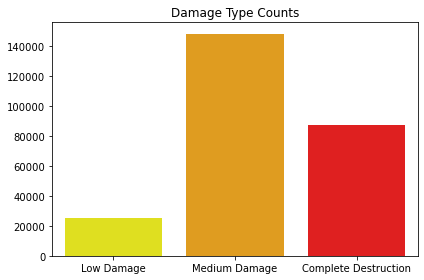

In [7]:
fig, ax = plt.subplots()

x = df['damage_grade'].value_counts().index
y = df['damage_grade'].value_counts().values

labels = ['Low Damage', 'Medium Damage', 'Complete Destruction']
color = ['yellow','orange', 'red']

ax = sns.barplot(x=x, y=y, palette=color)
ax.set_xticklabels(labels)
ax.set_title('Damage Type Counts')

plt.tight_layout()
fig.savefig('Images/classes.png')

Looks like are classes are imbalance this may cuase an issues down the road when we start training are models.

### Single Family Home Counts

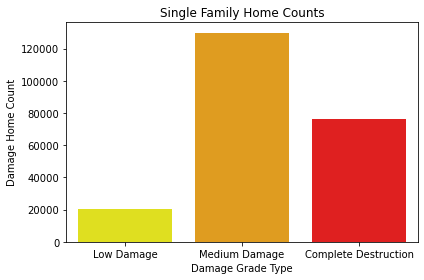

In [8]:
fig, ax = plt.subplots()

df_single_families = pd.DataFrame(df[df['count_families'] == 1]['damage_grade'].value_counts())
df_single_families['damage_grade_type'] = df_single_families.index

labels = ['Low Damage', 'Medium Damage', 'Complete Destruction']
color = ['yellow','orange', 'red']

ax = sns.barplot(data=df_single_families, x='damage_grade_type', y='damage_grade', palette=color)
ax.set_xticklabels(labels)
ax.set_title('Single Family Home Counts')
ax.set_xlabel('Damage Grade Type')
ax.set_ylabel('Damage Home Count')

plt.tight_layout()
fig.savefig('Images/single_family_count.png')

### Medium Damage Family Counts

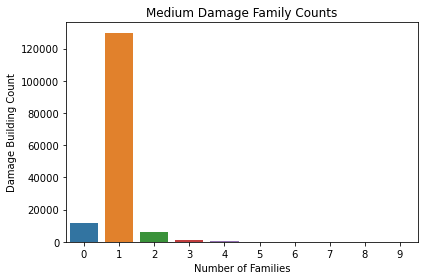

In [9]:
fig, ax = plt.subplots()

df_complete_destruction = pd.DataFrame(df[df['damage_grade'] == 2]['count_families'].value_counts())
df_complete_destruction['family_count'] = df_complete_destruction.index

ax = sns.barplot(data=df_complete_destruction, x='family_count', y='count_families')
ax.set_title('Medium Damage Family Counts')
ax.set_xlabel('Number of Families')
ax.set_ylabel('Damage Building Count')

plt.tight_layout()
fig.savefig('Images/medium_damage_family_counts.png')

## First Simple Model (FSM)

For the FSM we will use just the numerical columns and are classifier we will use a Decision Tree Classifer. First things first, we need to split that train by doing a train test split.

In [10]:
X_fsm = df.drop(['building_id', 'land_surface_condition', 'foundation_type', 
         'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 
         'legal_ownership_status', 'damage_grade'], axis=1)
y_fsm = df['damage_grade']

X_train_fsm, X_test_fsm, y_train_fsm, y_test_fsm = train_test_split(X_fsm, y_fsm, random_state=42, stratify=y_fsm)

In [11]:
fsm_dt = DecisionTreeClassifier(random_state=42, )
fsm_dt.fit(X_train_fsm, y_train_fsm)

DecisionTreeClassifier(random_state=42)

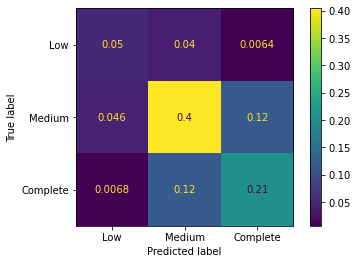

In [12]:
plot_confusion_matrix(fsm_dt, X_test_fsm, y_test_fsm, normalize='all', 
                      display_labels=['Low', 'Medium', 'Complete']);

In [13]:
y_hat_fsm = fsm_dt.predict(X_test_fsm)

In [14]:
print('  First Simple Model Scores')
print('-----------------------------')
print(' Accuracy:', accuracy_score(y_test_fsm, y_hat_fsm))
print('   Recall:', recall_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('Precision:', precision_score(y_test_fsm, y_hat_fsm, average = 'macro'))
print('       F1:', f1_score(y_test_fsm, y_hat_fsm, average = 'macro'))

  First Simple Model Scores
-----------------------------
 Accuracy: 0.6604503384445365
   Recall: 0.6149900294776912
Precision: 0.6073121797582424
       F1: 0.6109604665814518
